<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Multiple Rotations</h2>

The trivial way of implementing more than one rotation in parallel is to use a separate qubit for each rotation.

If we have $ t $ different rotations with angles $ \theta_1,\ldots,\theta_t $, then we can use $ t $ qubits.

Alternatively, we can use $ \log_2 (t) + 1 $ qubits (assuming that $t$ is a power of 2) that implement the following unitary matrix:

$$
    R(\theta_1,\ldots,\theta_t) = 
    \mymatrix{rr|rr|cc|rr}{
        \cos \theta_1 & -\sin \theta_1 & 0 & 0 & \cdots & \cdots & 0 & 0 \\ 
        \sin \theta_1 & \cos \theta_1 & 0 & 0 & \cdots & \cdots & 0 & 0 \\ \hline
        0 & 0 & \cos \theta_2 & -\sin \theta_2 & \cdots & \cdots  & 0 & 0  \\ 
        0 & 0 & \sin \theta_2 & \cos \theta_2 & \cdots & \cdots  & 0 & 0 \\ \hline
        \vdots & \vdots & \vdots & \vdots & \ddots & & \vdots & \vdots \\ 
        \vdots & \vdots & \vdots & \vdots & & \ddots & \vdots & \vdots \\ \hline
        0 & 0 & 0 & 0 & \cdots & \cdots & \cos \theta_t & -\sin \theta_t \\ 
        0 & 0 & 0 & 0 & \cdots & \cdots & \sin \theta_t & \cos \theta_t \\ 
    } .
$$

We can use this idea to solve the problem $\sf MOD_p$ (see <a href="B72_Rotation_Automata.ipynb" target="_blank">Rotation Automata</a>). 

We implement $ t $ rotation automata in this way.

At the beginning of the computation, we apply Hadamard operator in each qubit. Then, we apply the operator $ R(\theta_1,\ldots,\theta_t) $ for each symbol from the stream. Once the stream is finished, we apply Hadamard operator in each qubit again. 

If we observe only state 0 in each qubit, then we consider the stream having the length of a multiple of $\sf p$. Otherwise, we consider the stream having the length of not a multiple of $\sf p$.

<h3> Constructing $ R(\theta_1,\theta_2) $ </h3>

When $t=2$, $ \log_2 (2) + 1 = 2 $. So, both implementations use the same number of qubits.

But, it is a good starting point to construct the following unitary operator:

$$
    R(\theta_1,\theta_2) =
    \mymatrix{rrrr}{ 
        \cos \theta_1 & -\sin \theta_1 & 0 & 0 \\
        \sin \theta_1 & \cos \theta_1 & 0 & 0 \\
        0 & 0 & \cos \theta_2 & -\sin \theta_2 \\
        0 & 0 & \sin \theta_2 & \cos \theta_2 \\
    } .
$$

<div style="background-color:#f8f8f8;">
<b> Technical Remark:</b>

When two qubits are combined (tensored) in qiskit, say $  qreg[0] $ and $ qreg[1] $, they are ordered as $ qreg[1] \otimes qreg[0] $.

If there are $n$ qubits, say $ qreg[0],\ldots,qreg[n-1] $ to be combined, they are ordered in qiskit as 

$$ qreg[n-1] \otimes \cdots \otimes qreg[0] .  $$
</div>

We use a controlled rotation gate $ cu3 $ in qiskit. 

<b> Gate $u3$: </b>

The gate $ u3 $ is a generic one-qubit gate for rotation on Bloch sphere. It takes three parameters, and if we pass zeros as the second and third parameters, we implement our rotation gate $ ry $:

    u3(2*theta,0,0,qubit)
is equivalent to

    ry(2*theta,qubit)
Both make a rotation with angle $\theta$ in the real-valued qubit in counter-clockwise direction.

<b> Gate $cu3$: </b>

The two-qubit gate $ cu3 $ takes five parameters. We use it as follows:

    cu3(2*theta,0,0,control_qubit,target_qubit)
If the control qubit is in state $ \ket{1} $, then the rotation
    
    ry(2*theta,target_qubit)
is applied (to the target qubit).   

The base states of two qubits are ordered as $ \myarray{c}{00 \\ 01 \\ 10 \\ 11 } $ 
or equivalently grouped as $ \myarray{c}{ 0 \otimes \myvector{0 \\ 1} \\ \hline 1 \otimes \myvector{0 \\ 1} } $. 

We can apply a rotation to the first qubit controlled by the second qubit.

To construct $ R(\theta_1,\theta_2) $:
<ol>
    <li> When the second qubit is in state $ \ket{0} $, we can apply the rotation with angle $ \theta_1 $. </li>
    <li> When the second qubit is in state $ \ket{1} $, we can apply the rotation with angle $ \theta_2 $. </li>
</ol>

Now, we implement this by also printing the constructed unitary matrix.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# the angles of rotations
theta1 = pi/4
theta2 = pi/6

# the circuit with two qubits
qreg = QuantumRegister(2) 
creg = ClassicalRegister(2) 
mycircuit = QuantumCircuit(qreg,creg)


# when the second qubit is in |0>, the first qubit is rotated by theta1
mycircuit.x(qreg[1])
mycircuit.cu3(2*theta1,0,0,qreg[1],qreg[0])
mycircuit.x(qreg[1])

# when the second qubit is in |1>, the first qubit is rotated by theta2
mycircuit.cu3(2*theta2,0,0,qreg[1],qreg[0])
              
# we read the unitary matrix
job = execute(mycircuit,Aer.get_backend('unitary_simulator'),optimization_level=0)
u=job.result().get_unitary(mycircuit,decimals=3)
# we print the unitary matrix in nice format
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<8): val  = " "+val
        s = s + val
    print(s)
    



0.7071067811865476-0.7071067811865475     0.0     0.0
0.70710678118654750.7071067811865476     0.0     0.0
     0.0     0.00.8660254037844387-0.49999999999999994
     0.0     0.00.499999999999999940.8660254037844387


<h3>Task 1</h3>

Verify that the printed matrix is $ R(\pi/4,\pi/6) $.

In [2]:
from math import pi, cos, sin

# the angles of rotations
theta1 = pi/4
theta2 = pi/6

print(cos(theta1),-sin(theta1),0,0)
print(sin(theta1),cos(theta1),0,0)
print(0,0,cos(theta2),-sin(theta2))
print(0,0,sin(theta2),cos(theta2))

0.7071067811865476 -0.7071067811865475 0 0
0.7071067811865475 0.7071067811865476 0 0
0 0 0.8660254037844387 -0.49999999999999994
0 0 0.49999999999999994 0.8660254037844387


<a href="B76_Multiple_Rotations_Solutions.ipynb#task1">click for our solution</a>

<h3> Constructing $ R(\theta_1,\theta_2,\theta_3,\theta_4) $ </h3>

We can use $ \log_2(4) + 1 = 3 $ qubits to construct $ R(\theta_1,\theta_2,\theta_3,\theta_4) $.

The base states of three qubits are ordered as $ \myarray{c}{000 \\ 001 \\ 010 \\ 011 \\ 100 \\ 101 \\ 110 \\ 111 } $ 
or equivalently grouped as $ 
    \myarray{c}{ 
    00 \otimes \myvector{0 \\ 1} \\ \hline 
    01 \otimes \myvector{0 \\ 1} \\ \hline 
    10 \otimes \myvector{0 \\ 1}  \\ \hline 
    11 \otimes \myvector{0 \\ 1} 
    } $. 

By using a rotation gate controlled by two qubits, we can easily implement our unitary operator.

But, if we have a rotation gate controlled by only one qubit, then we use additional tricks (and qubits) and controlled CNOT gate by two qubits (also called Toffoli gate):

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)
<div style="background-color:#f9f9f9;">
In general, if $ t = 2^n $, then we can construct $ R(\theta_1,\ldots,\theta_t) $ by using no more than $ 2\log_2(t) $ qubits (instead of $t$ qubits). 
</div>

<h3> Pseudo construction </h3>
    
We start with a construction using three angles.

<h3> Task 2</h3>

Consider a quantum circuit with 3 qubits.

When the third qubit is in state $ \ket{1} $, apply the gate 

    cu3(2*theta1,0,0,qreg[2],qreg[0]) 

When the second qubit is in state $ \ket{1} $, apply the gate
    
    cu3(2*theta2,0,0,qreg[1],qreg[0])
    
When the third qubit is in state $ \ket{0} $, apply the gate

    cu3(2*theta3,0,0,qreg[2],qreg[0])

Guess the corresponding unitary matrix, which should be of the form:

$$
    \mymatrix{rr|rr|rr|rr}{
        \cos a_1 & -\sin a_1 & 0 & 0 & 0 & 0 & 0 & 0 \\
        \sin a_1 & \cos a_1 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline
        0 & 0 & \cos a_2 & -\sin a_2 & 0 & 0 & 0 & 0  \\
         0 & 0 & \sin a_2 & \cos a_2 & 0 & 0 & 0 & 0 \\ \hline
        0 & 0 & 0 & 0 & \cos a_3 & -\sin a_3 & 0 & 0  \\
         0 & 0 & 0 & 0 & \sin a_3 & \cos a_3 & 0 & 0  \\ \hline
        0 & 0 & 0 & 0 & 0 & 0 & \cos a_4 & -\sin a_4 \\
        0 & 0 & 0 & 0 & 0 & 0 & \sin a_4 & \cos a_4 \\ 
    }
$$

In other words, find $a_1$, $ a_2 $, $a_3$, and $a_4$ in terms of $ \theta_1 $, $\theta_2$, and $ \theta_3 $.

<a href="B76_Multiple_Rotations_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Implement Task 2 by picking three angles, and verify the constructed matrix.

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

theta1 = pi/4
theta2 = pi/6
theta3 = pi/8
a1 = theta3
a2 = theta2 + theta3
a3 = theta1
a4 = theta1 +theta2

qreg = QuantumRegister(3) 
creg = ClassicalRegister(3) 
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.cu3(2*theta1,0,0,qreg[2],qreg[0]) 
mycircuit.cu3(2*theta2,0,0,qreg[1],qreg[0])
mycircuit.x(qreg[2])
mycircuit.cu3(2*theta3,0,0,qreg[2],qreg[0])
mycircuit.x(qreg[2])
              
job = execute(mycircuit,Aer.get_backend('unitary_simulator'),optimization_level=0)
u=job.result().get_unitary(mycircuit,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<8): val  = " "+val
        s = s + val
    print(s)

print(f"sin(a1) = {sin(a1)} and cos(a1) = {cos(a1)}")
print(f"sin(a2) = {sin(a2)} and cos(a2) = {cos(a2)}")
print(f"sin(a3) = {sin(a3)} and cos(a3) = {cos(a3)}")
print(f"sin(a4) = {sin(a4)} cos(a4) = {cos(a4)}")

0.9238795325112867-0.3826834323650898     0.0     0.0     0.0     0.0     0.0     0.0
0.38268343236508980.9238795325112867     0.0     0.0     0.0     0.0     0.0     0.0
     0.0     0.00.6087614290087207-0.7933533402912352     0.0     0.0     0.0     0.0
     0.0     0.00.79335334029123520.6087614290087207     0.0     0.0     0.0     0.0
     0.0     0.0     0.0     0.00.7071067811865476-0.7071067811865475     0.0     0.0
     0.0     0.0     0.0     0.00.70710678118654750.7071067811865476     0.0     0.0
     0.0     0.0     0.0     0.0     0.0     0.00.2588190451025209-0.9659258262890682
     0.0     0.0     0.0     0.0     0.0     0.00.96592582628906820.2588190451025209
sin(a1) = 0.3826834323650898 and cos(a1) = 0.9238795325112867
sin(a2) = 0.793353340291235 and cos(a2) = 0.6087614290087208
sin(a3) = 0.7071067811865475 and cos(a3) = 0.7071067811865476
sin(a4) = 0.9659258262890682 cos(a4) = 0.25881904510252096


<a href="B76_Multiple_Rotations_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4</h3>

Create a circuit for solving problem $ \sf MOD_{31} $ by using the implementation in Task 3.

Pick $ \theta_1 $, $ \theta_2 $, and $ \theta_3 $ randomly.

At the beginning of the stream and after reading the stream, apply Hadamard operators to each qubit.

Execute your quantum program on the streams of lengths from 1 to 31.

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
from random import randrange

rand_mul = [randrange(1,31),randrange(1,31),randrange(1,31)]
theta1 = rand_mul[0]*pi/31
theta2 = rand_mul[1]*pi/31
theta3 = rand_mul[2]*pi/31

max_percentage = 0

for i in range(1,31):
    q = QuantumRegister(3) 
    c = ClassicalRegister(3) 
    qc = QuantumCircuit(q,c)
    
    qc.h(q)
    
    for j in range(i):
        #When the third qubit is in state  |1⟩ , apply the gate
        qc.cu3(2*theta1,0,0,q[2],q[0]) 

        #When the second qubit is in state  |1⟩ , apply the gate
        qc.cu3(2*theta2,0,0,q[1],q[0])

        #When the third qubit is in state  |0⟩ , apply the gate
        qc.x(q[2])
        qc.cu3(2*theta3,0,0,q[2],q[0])
        qc.x(q[2])
    
    qc.h(q)
    
    qc.measure(q,c)
        
    # we read the unitary matrix
    job = execute(qc,Aer.get_backend('qasm_simulator'),optimization_level=0,shots = 1000)
    counts = job.result().get_counts(qc)
    
    if '000' in counts.keys():
        c = counts['000']
    else:
        c = 0

    print("For stream",i,"-->",counts)
    percentage = c/1000*100
    if percentage > max_percentage:
        max_percentage = percentage
        stream = i
    print("Max percentage of stream", i, "is", percentage,"\n")
    
print("Max percentage ::",max_percentage,"for stream",stream)
    

For stream 1 --> {'000': 617, '001': 1, '010': 1, '011': 186, '101': 154, '110': 41}
Max percentage of stream 1 is 61.7 

For stream 2 --> {'000': 100, '010': 4, '011': 298, '100': 2, '101': 161, '110': 430, '111': 5}
Max percentage of stream 2 is 10.0 

For stream 3 --> {'011': 37, '101': 3, '110': 929, '111': 31}
Max percentage of stream 3 is 0.0 

For stream 4 --> {'000': 8, '001': 1, '010': 1, '011': 56, '100': 8, '101': 186, '110': 709, '111': 31}
Max percentage of stream 4 is 0.8 

For stream 5 --> {'000': 262, '001': 15, '010': 11, '011': 111, '100': 25, '101': 370, '110': 195, '111': 11}
Max percentage of stream 5 is 26.200000000000003 

For stream 6 --> {'000': 752, '001': 90, '011': 7, '100': 15, '101': 133, '110': 3}
Max percentage of stream 6 is 75.2 

For stream 7 --> {'000': 765, '001': 88, '010': 15, '011': 132}
Max percentage of stream 7 is 76.5 

For stream 8 --> {'000': 228, '001': 39, '010': 65, '011': 426, '100': 12, '101': 82, '110': 127, '111': 21}
Max percentage 

<a href="B76_Multiple_Rotations_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5 (optional)</h3>

Based on Task 4, design your own solution for problem $ \sf MOD_{91} $ by using four qubits.

Remark that up to 8 different rotations can be implemented by using four qubits.

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
from random import randrange

rand_mul = [randrange(1,31),randrange(1,31),randrange(1,31)]

theta1 = rand_mul[0]*pi/31
theta2 = rand_mul[1]*pi/31
theta3 = rand_mul[2]*pi/31

max_percentage = 0

for i in range(1,31):
    q = QuantumRegister(3) 
    c = ClassicalRegister(3) 
    qc = QuantumCircuit(q,c)
    
    qc.h(q)
    
    for j in range(i):
        qc.cu3(2*theta1,0,0,q[2],q[0]) 
        qc.cu3(2*theta2,0,0,q[1],q[0])
        qc.x(q[2])
        qc.cu3(2*theta3,0,0,q[2],q[0])
        qc.x(q[2])
    
    qc.h(q)
    
    qc.measure(q,c)
        
    job = execute(qc,Aer.get_backend('qasm_simulator'),optimization_level=0,shots = 1000)
    counts = job.result().get_counts(qc)
    
    if '000' in counts.keys():
        c = counts['000']
    else:
        c = 0        
        
    print("For stream",i,"-->",counts)
    percentage = c/1000*100
    if percentage > max_percentage:
        max_percentage = percentage
        stream = i
    print("Max percentage of stream", i, "is", percentage,"\n")
    
print("Max percentage ::",max_percentage,"for stream",stream)
    

For stream 1 --> {'000': 45, '001': 693, '010': 98, '011': 8, '100': 123, '101': 11, '111': 22}
Max percentage of stream 1 is 4.5 

For stream 2 --> {'000': 185, '001': 50, '010': 60, '011': 198, '100': 56, '101': 174, '110': 200, '111': 77}
Max percentage of stream 2 is 18.5 

For stream 3 --> {'000': 11, '001': 5, '010': 58, '011': 43, '100': 56, '101': 51, '110': 386, '111': 390}
Max percentage of stream 3 is 1.0999999999999999 

For stream 4 --> {'010': 1, '011': 1, '100': 3, '110': 278, '111': 717}
Max percentage of stream 4 is 0.0 

For stream 5 --> {'000': 36, '001': 5, '010': 16, '011': 136, '100': 29, '101': 133, '110': 591, '111': 54}
Max percentage of stream 5 is 3.5999999999999996 

For stream 6 --> {'000': 1, '001': 339, '010': 243, '100': 223, '111': 194}
Max percentage of stream 6 is 0.1 

For stream 7 --> {'000': 799, '001': 41, '010': 4, '011': 76, '100': 1, '101': 73, '110': 6}
Max percentage of stream 7 is 79.9 

For stream 8 --> {'000': 209, '001': 770, '010': 7, '0

<h3> Main construction </h3>

To implement an operator controlled by two qubits, we use an auxiliary qubit.

Depending on the desired values of two qubits, the auxiliary qubit is flipped to $ \ket{1} $ and then the operation is implemented controlled by the auxiliary qubit.

Here we describe the case when the control qubits are in state $ \ket{01} $. 

We also draw the circuit. 

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# initialize the circuit
qreg = QuantumRegister(4)  
circuit = QuantumCircuit(qreg)

# we use the fourth qubit as the auxiliary

# apply a rotation to the first qubit when the third and second qubits are in states |0> and |1>
# change the state of the third qubit to |1>
circuit.x(qreg[2])
# if both the third and second qubits are in states |1>, the state of auxiliary qubit is changed to |1> 
circuit.ccx(qreg[2],qreg[1],qreg[3])
# the rotation is applied to the first qubit if the state of auxiliary qubit is |1>
circuit.cu3(2*pi/6,0,0,qreg[3],qreg[0])
# reverse the effects
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.x(qreg[2])

circuit.draw()

Based on this idea, different rotation operators are applied to the first qubit when the third and second qubits are in $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $. 

We present how to construct $ R(\pi/10,2\pi/10,3\pi/10,4\pi/10) $. 

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi,sin

# the angles of rotations
theta1 = pi/10
theta2 = 2*pi/10
theta3 = 3*pi/10
theta4 = 4*pi/10

# for verification, print sin(theta)'s
print("sin(theta1) = ",round(sin(theta1),3))
print("sin(theta2) = ",round(sin(theta2),3))
print("sin(theta3) = ",round(sin(theta3),3))
print("sin(theta4) = ",round(sin(theta4),3))
print()

qreg =  QuantumRegister(4) 
circuit = QuantumCircuit(qreg)

# the third qubit is in |0>
# the second qubit is in |0>
circuit.x(qreg[2])
circuit.x(qreg[1])
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.cu3(2*theta1,0,0,qreg[3],qreg[0])
# reverse the effects
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.x(qreg[1])
circuit.x(qreg[2])


# the third qubit is in |0>
# the second qubit is in |1>
circuit.x(qreg[2])
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.cu3(2*theta2,0,0,qreg[3],qreg[0])
# reverse the effects
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.x(qreg[2])

# the third qubit is in |1>
# the second qubit is in |0>
circuit.x(qreg[1])
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.cu3(2*theta3,0,0,qreg[3],qreg[0])
# reverse the effects
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.x(qreg[1])

# the third qubit is in |1>
# the second qubit is in |1>
circuit.ccx(qreg[2],qreg[1],qreg[3])
circuit.cu3(2*theta4,0,0,qreg[3],qreg[0])
# reverse the effects
circuit.ccx(qreg[2],qreg[1],qreg[3])

# read the corresponding unitary matrix
job = execute(circuit,Aer.get_backend('unitary_simulator'),optimization_level=0)
unitary_matrix=job.result().get_unitary(circuit,decimals=3)
for i in range(len(unitary_matrix)):
    s=""
    for j in range(len(unitary_matrix)):
        val = str(unitary_matrix[i][j].real)
        while(len(val)<7): val  = " "+val
        s = s + val
    print(s)

<b>Remarks:</b> 

The constructed matrix is bigger than our main matrix because of the auxiliary qubit.

Our main matrix appears at the top-left quarter of the constructed matrix.

The rest of the constructed matrix does not affect our computation unless the auxiliary qubit is set to state $ \ket{1} $ (except the auxiliary operations).

<h3>Task 6 (optional)</h3>

Assume that $\theta_1=\frac{\pi}{11}$, $\theta_2=2\frac{\pi}{11}$, $\theta_3=4\frac{\pi}{11}$, and $\theta_4=8\frac{\pi}{11}$ are the given angles in the above construction.

Calculate (by hand or in your mind) the angles of the rotations in the bottom-left quarter of the constructed matrix by following the construction steps.

<h3>Task 7</h3>

Create a circuit for solving problem $ \sf MOD_{61} $ by using the above implementation.

Pick $ \theta_1 $, $ \theta_2 $, $ \theta_3 $, and $ \theta_4 $ randomly.

At the beginning of the stream and after reading the stream, apply Hadamard operators to each qubit.

Execute your quantum program on the streams of lengths 1, 11, 21, 31, 41, 51, and 61.

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi,sin

rand_mult = [randrange(1,31),randrange(1,31),randrange(1,31),randrange(1,31)]

theta1 = rand_mult[0]*pi/61
theta2 = rand_mult[1]*pi/61
theta3 = rand_mult[2]*pi/61
theta4 = rand_mult[3]*pi/61

max_percentage = 0

for i in [1,11,21,31,41,51,61]:
    
    q =  QuantumRegister(4) 
    c = ClassicalRegister(4)
    qc = QuantumCircuit(q,c)
    
    qc.h(q)
    
    for j in range(i): 
        qc.x(q[2])
        qc.x(q[1])
        qc.ccx(q[2],q[1],q[3])
        qc.cu3(2*theta1,0,0,q[3],q[0])

        qc.ccx(q[2],q[1],q[3])
        qc.x(q[1])
        qc.x(q[2])

        qc.x(q[2])
        qc.ccx(q[2],q[1],q[3])
        qc.cu3(2*theta2,0,0,q[3],q[0])

        qc.ccx(q[2],q[1],q[3])
        qc.x(q[2])

        qc.x(q[1])
        qc.ccx(q[2],q[1],q[3])
        qc.cu3(2*theta3,0,0,q[3],q[0])
        qc.ccx(q[2],q[1],q[3])
        qc.x(q[1])

        qc.ccx(q[2],q[1],q[3])
        qc.cu3(2*theta4,0,0,q[3],q[0])
        qc.ccx(q[2],q[1],q[3])
    
    qc.h(q)
    qc.measure(q,c)
    
    job = execute(qc,Aer.get_backend('qasm_simulator'),optimization_level=0,shots = 1000)
    counts = job.result().get_counts(qc)

    if '0000' in counts.keys():
        c = counts['0000']
    else:
        c = 0

    print("For stream",i,"-->",counts)    
    percentage = c/1000*100
    if percentage > max_percentage:
        max_percentage = percentage
        stream = i
    print("Max percentage of stream", i, "is", percentage,"\n")
    
print("Max percentage ::",max_percentage,"for stream",stream)


For stream 1 --> {'0000': 36, '0001': 510, '0010': 3, '0011': 59, '0101': 3, '0111': 1, '1000': 283, '1001': 21, '1010': 77, '1011': 3, '1100': 4}
Max percentage of stream 1 is 3.5999999999999996 

For stream 11 --> {'0000': 22, '0001': 200, '0010': 22, '0011': 187, '0100': 22, '0101': 264, '0110': 19, '0111': 192, '1000': 5, '1010': 31, '1011': 3, '1100': 7, '1101': 1, '1110': 18, '1111': 7}
Max percentage of stream 11 is 2.1999999999999997 

For stream 21 --> {'0000': 319, '0001': 211, '0010': 11, '0011': 7, '0101': 1, '0110': 7, '0111': 3, '1000': 24, '1001': 50, '1010': 87, '1011': 142, '1100': 33, '1101': 49, '1110': 22, '1111': 34}
Max percentage of stream 21 is 31.900000000000002 

For stream 31 --> {'0000': 99, '0001': 3, '0010': 154, '0100': 9, '0110': 40, '1001': 4, '1011': 1, '1100': 16, '1101': 660, '1111': 14}
Max percentage of stream 31 is 9.9 

For stream 41 --> {'0000': 48, '0001': 8, '0010': 422, '0011': 89, '0100': 2, '0101': 1, '0110': 3, '0111': 1, '1000': 2, '1001'

<a href="B76_Multiple_Rotations_Solutions.ipynb#task7">click for our solution</a>

<h3>Task 8</h3>

How many qubits we use to implement the main construction having 16 rotations in parallel?

Please specify the number of control qubits and auxiliary qubits.

<a href="B76_Multiple_Rotations_Solutions.ipynb#task8">click for our solution</a>

<h3>Bonus (saving some qubits)</h3>

We can use additional trick to save some qubits in our implementation. The idea relies on the following fact: if you apply a rotation between two NOT gates, the rotation will happen in the opposite direction.

We can use this idea to implement a rotation by $\theta$ in the following way:
<ul>
    <li>Rotate in the qubit by $\frac{\theta}{2}$;</li>
    <li>Apply NOT to the qubit;</li>
    <li>Rotate in the qubit by $-\frac{\theta}{2}$;</li>
    <li>Apply NOT to the qubit.</li>
</ul>

As a result we will rotate in the qubit by $\theta$. We can control NOT and rotation operations and perform a rotation only when all control qubits are in state 1, relying on the following simple facts:
<ul>
    <li>Two NOT gates result into identity operation;</li>
    <li>Rotations by $\frac{\theta}{2}$ and $-\frac{\theta}{2}$  result into identity operation.</li>
</ul>

Below you can see the code that shows how can we use the discussed ideas to control rotations on one qubit by three qubits. If the state of at least one of the control qubits is 0, then the identity will be applied to the controlled qubit.

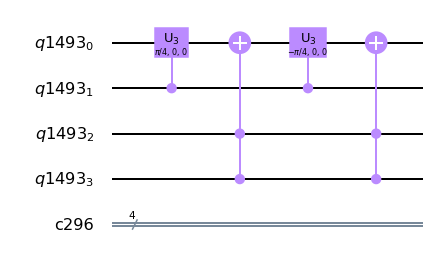

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

qreg11 =  QuantumRegister(4)
creg11 = ClassicalRegister(4)

theta = pi/4

# define our quantum circuit
mycircuit11 = QuantumCircuit(qreg11,creg11)

def ccc_ry(angle,q1,q2,q3,q4):
    mycircuit11.cu3(angle/2,0,0,q3,q4)
    mycircuit11.ccx(q1,q2,q4)
    mycircuit11.cu3(-angle/2,0,0,q3,q4)
    mycircuit11.ccx(q1,q2,q4)
    
ccc_ry(2*theta,qreg11[3],qreg11[2],qreg11[1],qreg11[0])

mycircuit11.draw(output='mpl')

The code below demonstrates the implementation of 8 rotations with total 4 qubits, one of which is controlled by others.

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

qreg12 =  QuantumRegister(4)
creg12 = ClassicalRegister(4)

theta1 = pi/16
theta2 = 2*pi/16
theta3 = 3*pi/16
theta4 = 4*pi/16
theta5 = 5*pi/16
theta6 = 6*pi/16
theta7 = 7*pi/16
theta8 = 8*pi/16

# define our quantum circuit
mycircuit12 = QuantumCircuit(qreg12,creg12)

def ccc_ry(angle,q1,q2,q3,q4):
    mycircuit12.cu3(angle/2,0,0,q3,q4)
    mycircuit12.ccx(q1,q2,q4)
    mycircuit12.cu3(-angle/2,0,0,q3,q4)
    mycircuit12.ccx(q1,q2,q4)
    
mycircuit12.x(qreg12[3])
mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[1])
ccc_ry(2*theta1,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
mycircuit12.x(qreg12[1])
mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[3])

mycircuit12.x(qreg12[3])
mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[1])
ccc_ry(2*theta2,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
#mycircuit12.x(qreg12[1])
mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[3])

mycircuit12.x(qreg12[3])
#mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[1])
ccc_ry(2*theta3,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
mycircuit12.x(qreg12[1])
#mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[3])

mycircuit12.x(qreg12[3])
#mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[1])
ccc_ry(2*theta4,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
#mycircuit12.x(qreg12[1])
#mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[3])

#mycircuit12.x(qreg12[3])
mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[1])
ccc_ry(2*theta5,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
mycircuit12.x(qreg12[1])
mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[3])

#mycircuit12.x(qreg12[3])
mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[1])
ccc_ry(2*theta6,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
#mycircuit12.x(qreg12[1])
mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[3])

#mycircuit12.x(qreg12[3])
#mycircuit12.x(qreg12[2])
mycircuit12.x(qreg12[1])
ccc_ry(2*theta7,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
mycircuit12.x(qreg12[1])
#mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[3])

#mycircuit12.x(qreg12[3])
#mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[1])
ccc_ry(2*theta8,qreg12[3],qreg12[2],qreg12[1],qreg12[0])
#mycircuit12.x(qreg12[1])
#mycircuit12.x(qreg12[2])
#mycircuit12.x(qreg12[3])

job = execute(mycircuit12,Aer.get_backend('unitary_simulator'),optimization_level=0)
u=job.result().get_unitary(mycircuit12,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<7): val  = " "+val
        s = s + val
    print(s)

0.9807852804032304-0.1950903220161282    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
0.19509032201612820.9807852804032304    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.00.9238795325112865-0.3826834323650897    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.00.38268343236508970.9238795325112865    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    0.00.8314696123025452-0.5555702330196022    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    0.00.55557023301960220.8314696123025452    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    0.0    0.0    0.00.7071067811865475-0.7071067811865474    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
    0.0    0.0    0.0    0.0    0.0    0.00.7071067

<h3>Task 9</h3>

By using the discussed ideas, how many qubits can we have to implement 16 rotations in parallel?

Please specify the number of control qubits and auxiliary qubits.

<a href="B76_Multiple_Rotations_Solutions.ipynb#task9">click for our solution</a>